# ML Model Migration Example
### *By Tianyu (Sky) Lu*
### *tianyu@lu.fm*
### *2024-06-20 18:35 CST*

### Environment Information

    python 3.12.3
    tensorflow 2.16.1
    keras 3.3.3
    onnx 1.16.1
    tf2onnx 1.16.1


### Path

Keras 3 Model -> ONNX Model -> Other Formats

### Stage 1 - Keras 3 Model -> ONNX Model

In [1]:
import tensorflow as tf
import keras

2024-06-23 05:11:08.471431: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = keras.models.load_model("./cnn0912.keras")

/home/suroot/miniconda3/envs/EDTA2_cp/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'Adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 389, 32)        │         1,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 97, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3104)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        49,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,020 (609.46 KB)

 Trainable params: 52,006 (203.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104,014 (406.31 KB)

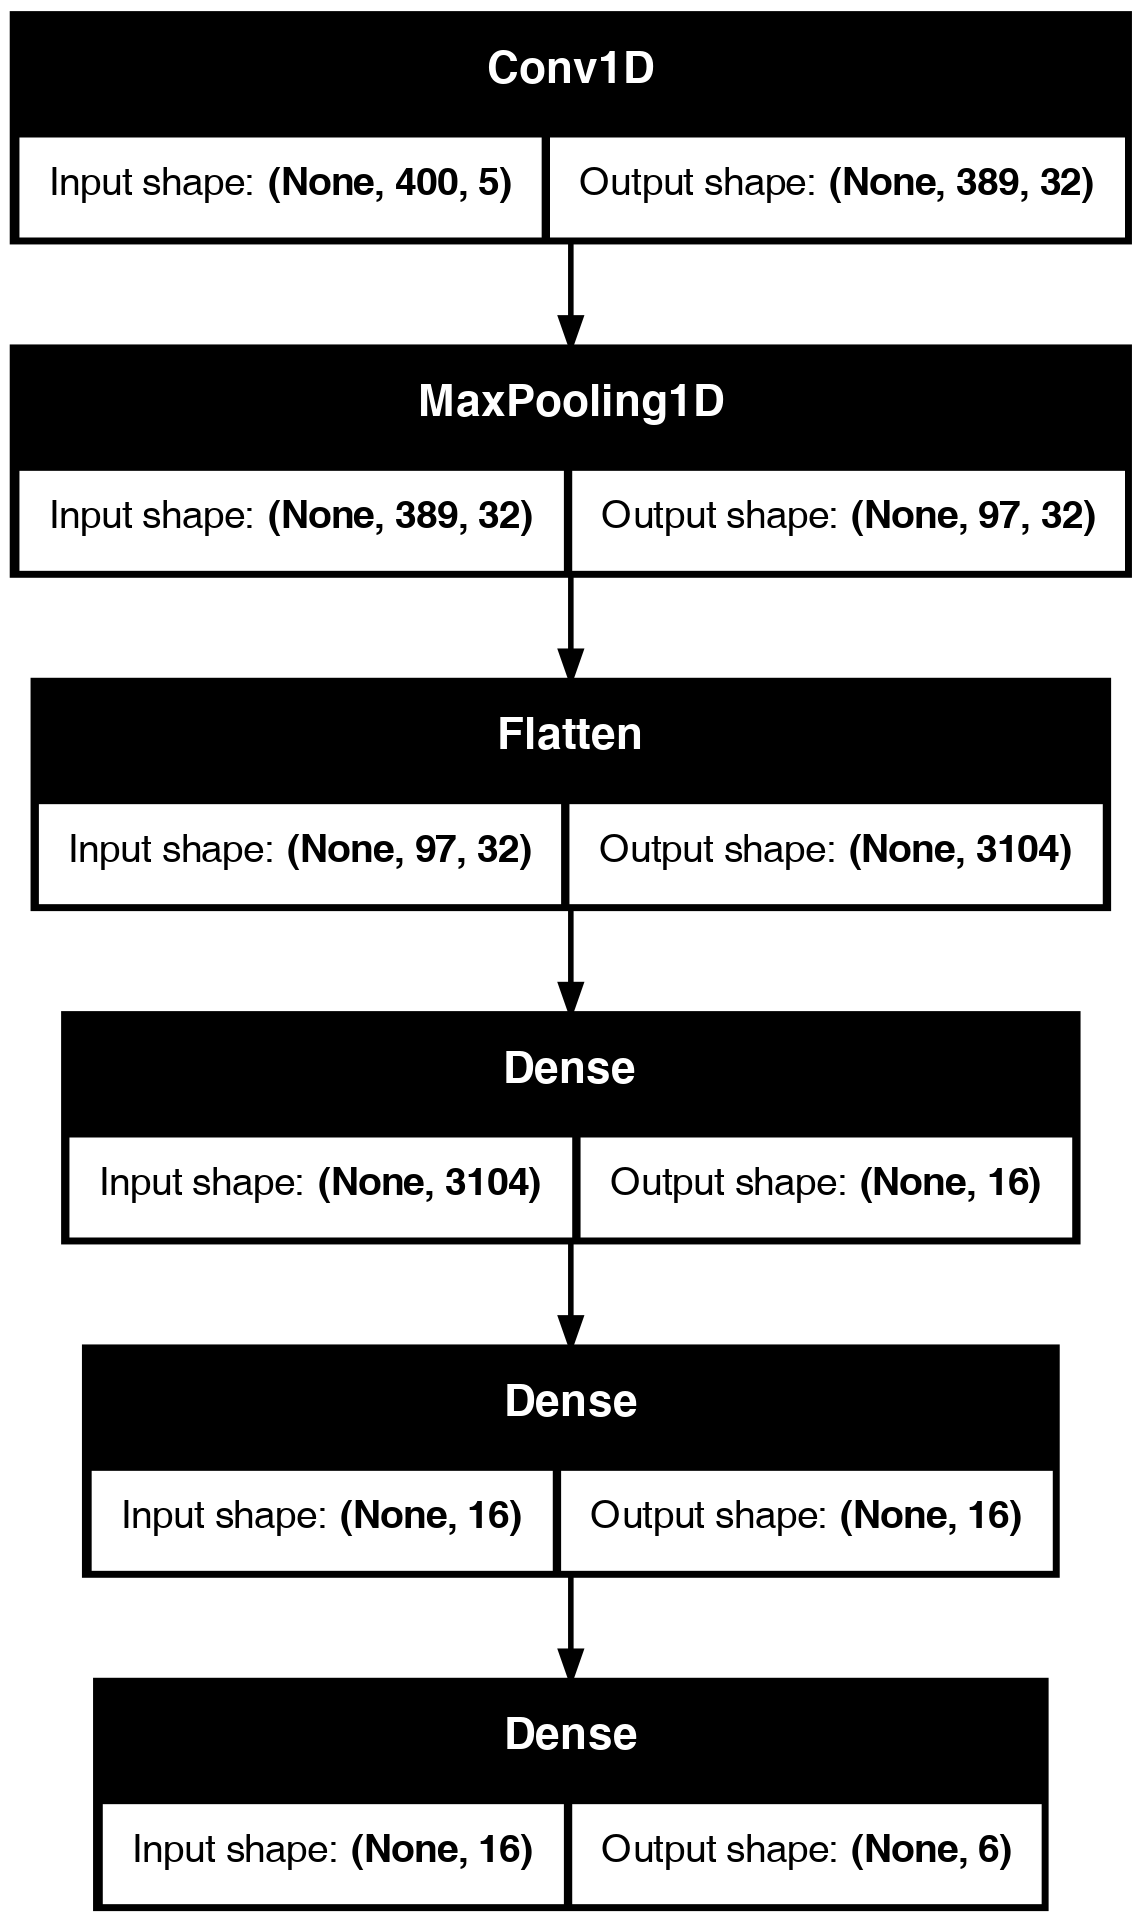

In [4]:
keras.utils.plot_model(model, show_shapes=True)

In [5]:
import onnx
import tf2onnx

In [6]:
spec = (tf.TensorSpec((None, 400, 5), tf.float32, name="input"),)
output_path = "cnn0912.onnx"
model.output_names=["output"] # Solved onnx/tensorflow-onnx Issue #2319

model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13, output_path=output_path)

2024-06-23 05:11:40.488571: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2024-06-23 05:11:40.489269: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-06-23 05:11:40.602680: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2024-06-23 05:11:40.602808: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session


### Stage 2 - Example: ONNX -> Pytorch

This is just an example for the second stage showing that you can convert from ONNX to other formats. You should develop your own code according to your needs.

In [7]:
import onnx
import torch
from onnx2torch import convert

In [11]:
onnx_model_path = "./cnn0912.onnx"
onnx_model = onnx.load(onnx_model_path)
torch_model = convert(onnx_model)

output_path = "cnn0912.pt"
torch.save(torch_model, output_path)